In [1]:
suppressPackageStartupMessages({
    library(granulator)
})

In [2]:
load_ABIS()

[1] "ABIS dataset was loaded successfully."

In [3]:
# create list if multiple signature matrices to test simultaneously
sigList = list(
  ABIS_S0 = sigMatrix_ABIS_S0,
  ABIS_S1 = sigMatrix_ABIS_S1, 
  ABIS_S2 = sigMatrix_ABIS_S2, 
  ABIS_S3 = sigMatrix_ABIS_S3)

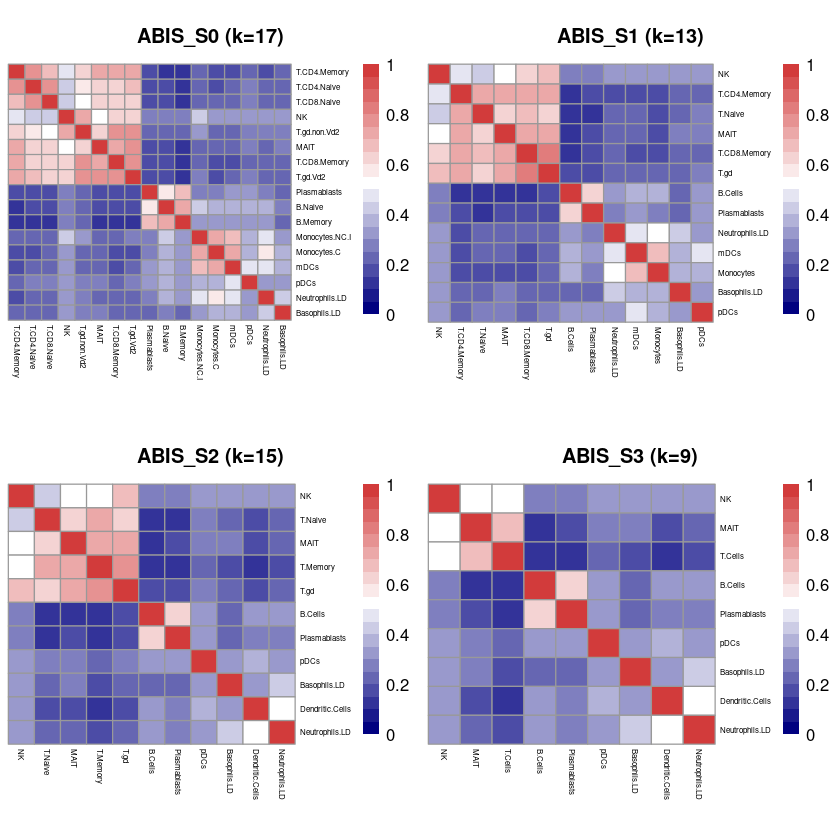

In [4]:
plot_similarity(sigMatrix=sigList)

In [5]:
data_path <- "/home/ubuntu/data/bioinfo_sm207"

In [6]:
zuma7 <- read.delim(file.path(data_path, "zuma7_tpm.txt"), row.names=1)
zuma7_mat <- as.matrix(zuma7)
head(zuma7_mat)

,SM201_001,SM201_003,SM201_004,SM201_005,SM201_006,SM201_007,SM201_008,SM201_010,SM201_012,SM201_013,⋯,SM201_362,SM201_363,SM201_364,SM201_365,SM201_366,SM201_368,SM201_370,SM201_373,SM201_375,SM201_377
TSPAN6,0.491837,2.179757,0.578250,1.377382,0.363267,0.347882,0.397045,0.322080,0.76350,0.486185,⋯,0.372339,0.313189,0.272109,0.542107,0.271416,0.908039,0.668750,21.813536,0.762934,1.092354
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.373128,0.000000,0.000000
DPM1,37.958604,22.210138,24.886300,31.539660,28.740553,8.849050,20.505716,20.862916,23.59883,21.194202,⋯,47.446082,39.976736,27.721150,32.869582,17.744461,19.048174,30.581954,58.396274,27.889739,31.217111
SCYL3,2.245506,5.470210,7.500091,5.709230,2.041204,2.133704,3.979049,3.457135,4.79570,4.399244,⋯,4.354716,5.080633,4.552555,6.292499,5.416609,3.529254,4.956493,2.264835,6.018898,6.221829
C1orf112,14.123682,2.654492,6.865448,9.848350,22.658682,19.421649,4.748431,9.396876,15.54963,23.877036,⋯,15.398473,20.522596,6.585069,17.265428,7.637424,7.474516,6.616284,12.231005,20.401616,14.900051
FGR,23.473791,7.138751,14.756054,19.496712,3.944359,2.233030,2.506708,1.964529,19.84528,1.865670,⋯,15.731914,10.149870,20.637448,3.907404,6.999795,6.434234,25.608852,4.832435,10.074743,14.947790


In [7]:
decon <- suppressMessages(deconvolute(m = zuma7_mat, sigMatrix = sigList, use_cores = 8))

In [8]:
names(decon$proportions)

[1] "dtangle_ABIS_S0" "dtangle_ABIS_S1" "dtangle_ABIS_S2" "dtangle_ABIS_S3"
 [5] "nnls_ABIS_S0"    "nnls_ABIS_S1"    "nnls_ABIS_S2"    "nnls_ABIS_S3"   
 [9] "ols_ABIS_S0"     "ols_ABIS_S1"     "ols_ABIS_S2"     "ols_ABIS_S3"    
[13] "qprog_ABIS_S0"   "qprog_ABIS_S1"   "qprog_ABIS_S2"   "qprog_ABIS_S3"  
[17] "qprogwc_ABIS_S0" "qprogwc_ABIS_S1" "qprogwc_ABIS_S2" "qprogwc_ABIS_S3"
[21] "rls_ABIS_S0"     "rls_ABIS_S1"     "rls_ABIS_S2"     "rls_ABIS_S3"    
[25] "svr_ABIS_S0"     "svr_ABIS_S1"     "svr_ABIS_S2"     "svr_ABIS_S3"

In [9]:
head(decon$proportions[[names(decon$proportions)[1]]])

,B.Memory,B.Naive,Basophils.LD,MAIT,mDCs,Monocytes.C,Monocytes.NC.I,Neutrophils.LD,NK,pDCs,Plasmablasts,T.CD4.Memory,T.CD4.Naive,T.CD8.Memory,T.CD8.Naive,T.gd.non.Vd2,T.gd.Vd2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SM201_001,34.31,2.94,0.98,0.98,1.96,12.75,9.80,3.92,1.96,0.98,0,10.78,3.92,0.98,11.76,0.00,0
SM201_003,36.27,4.90,0.00,0.98,2.94,3.92,5.88,1.96,1.96,2.94,0,9.80,6.86,0.98,16.67,0.98,0
SM201_004,27.45,20.59,0.00,0.98,0.98,1.96,3.92,0.98,0.98,1.96,0,18.63,7.84,0.98,9.80,0.00,0
SM201_005,27.45,1.96,1.96,0.98,1.96,6.86,12.75,3.92,3.92,1.96,0,12.75,5.88,2.94,13.73,0.00,0
SM201_006,29.41,6.86,0.98,0.98,1.96,5.88,10.78,3.92,2.94,1.96,0,11.76,3.92,1.96,15.69,0.00,0
SM201_007,12.75,2.94,0.98,0.98,0.98,2.94,3.92,0.98,1.96,1.96,0,41.18,8.82,0.98,14.71,0.98,0


In [10]:
head(decon$proportions$ols_ABIS_S3)

,B.Cells,Basophils.LD,Dendritic.Cells,MAIT,Neutrophils.LD,NK,pDCs,Plasmablasts,T.Cells
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SM201_001,19.37,0.00,3.91,0.19,1.49,0,0.19,0,13.59
SM201_003,21.42,0.00,3.91,0.19,0.37,0,0.00,0,11.73
SM201_004,33.52,0.00,4.28,0.00,0.19,0,0.00,0,15.08
SM201_005,1.49,0.19,16.39,0.19,0.37,0,0.19,0,13.59
SM201_006,9.31,0.00,3.91,0.19,0.37,0,0.19,0,3.91
SM201_007,27.00,0.00,5.40,0.19,0.00,0,0.00,0,10.24


In [11]:
# save to files
for (name in names(decon$proportions)) {
    df <- decon$proportions[[name]]
    write.csv(df, file.path(data_path, "granulator_outs", "zuma7", paste0(name, ".csv")))
    }

In [12]:
correl <- correlate(deconvoluted = decon)

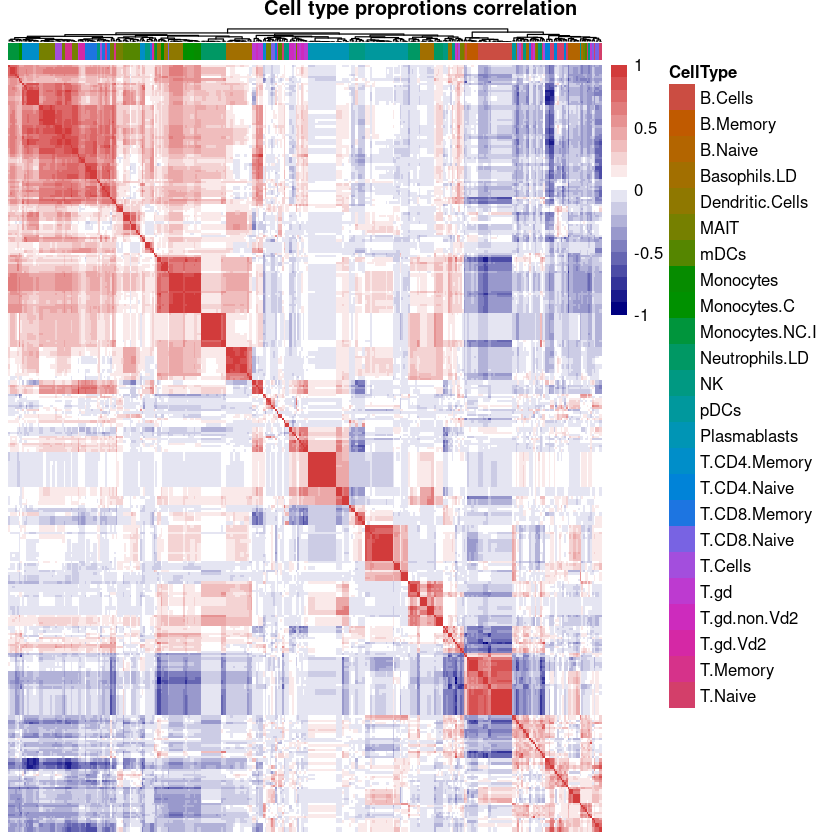

In [13]:
plot_correlate(correlated = correl, method="heatmap", legend=TRUE)

In [14]:
head(correl$summary)

,signature,cellType,mean_correlation
,<chr>,<chr>,<dbl>
1,ABIS_S0,B.Memory,0.6590
2,ABIS_S0,B.Naive,0.6769
3,ABIS_S0,Basophils.LD,0.2864
4,ABIS_S0,MAIT,0.2724
5,ABIS_S0,Monocytes.C,0.7366
6,ABIS_S0,Monocytes.NC.I,0.7195


In [15]:
head(correl$rank)

,signature,method,mean_correlation
,<chr>,<chr>,<dbl>
1,ABIS_S3,ols,0.6663
2,ABIS_S3,qprog,0.6663
3,ABIS_S3,nnls,0.6662
4,ABIS_S2,ols,0.6409
5,ABIS_S2,qprog,0.6409
6,ABIS_S1,ols,0.6310


In [16]:
correl$rank[order(correl$rank$signature),]

,signature,method,mean_correlation
,<chr>,<chr>,<dbl>
8,ABIS_S0,nnls,0.6216
10,ABIS_S0,ols,0.6141
11,ABIS_S0,qprog,0.6141
17,ABIS_S0,qprogwc,0.5006
18,ABIS_S0,rls,0.5000
23,ABIS_S0,svr,0.4220
27,ABIS_S0,dtangle,0.2116
6,ABIS_S1,ols,0.6310
7,ABIS_S1,qprog,0.6310
